In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [148]:
train_data = pd.read_csv('../data/public.train.csv')
test_data = pd.read_csv('../data/public.test.csv')


In [149]:
y = train_data['发电量']
X = train_data.drop(['ID','发电量'], axis=1)

# 简单抽样   但是根据题干尝试使用分层抽样
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=233, 
#                                                    )

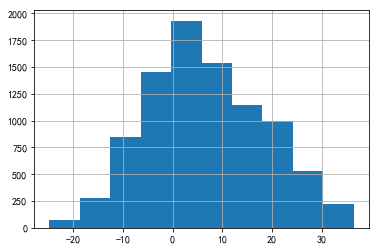

In [150]:
%matplotlib inline
X['板温'].hist(bins=10)

In [151]:
X["板温分层"] = np.ceil(X['板温'])
X["板温分层"]


0      -19.0
1      -18.0
2      -17.0
3      -15.0
4      -14.0
5      -14.0
6      -11.0
7      -10.0
8      -10.0
9       -8.0
10      -5.0
11      -4.0
12      -3.0
13      -3.0
14      -2.0
15      -1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       2.0
22       4.0
23       4.0
24       5.0
25       5.0
26       6.0
27       6.0
28       6.0
29       7.0
        ... 
8970    29.0
8971    30.0
8972    31.0
8973    31.0
8974    32.0
8975    32.0
8976    33.0
8977    32.0
8978    32.0
8979    32.0
8980    32.0
8981    33.0
8982    33.0
8983    34.0
8984    33.0
8985    33.0
8986    33.0
8987    34.0
8988    34.0
8989    34.0
8990    32.0
8991    32.0
8992    33.0
8993    35.0
8994    35.0
8995    36.0
8996    37.0
8997    37.0
8998    37.0
8999     1.0
Name: 板温分层, Length: 9000, dtype: float64

In [152]:
X["板温分层"].value_counts()

 5.0     366
 1.0     347
 6.0     320
 3.0     315
 4.0     302
 7.0     297
 9.0     285
 8.0     271
 2.0     268
-0.0     254
-5.0     247
-2.0     242
 10.0    238
-3.0     232
-1.0     227
-6.0     225
-4.0     216
 17.0    212
 19.0    210
 13.0    208
 11.0    199
-7.0     197
 12.0    196
 16.0    194
 18.0    181
 21.0    173
 15.0    167
 23.0    167
-8.0     162
 22.0    159
        ... 
 24.0    131
 25.0    123
-9.0     117
-10.0    116
 26.0    114
 27.0     95
-11.0     94
 29.0     79
 28.0     73
-12.0     68
 31.0     65
-13.0     65
 32.0     55
 30.0     52
-14.0     51
 33.0     50
-15.0     44
-16.0     34
 34.0     32
-17.0     31
-18.0     24
 35.0     23
-19.0     20
-20.0     16
 36.0     12
-22.0      9
-21.0      9
 37.0      7
-23.0      6
-24.0      2
Name: 板温分层, Length: 62, dtype: int64

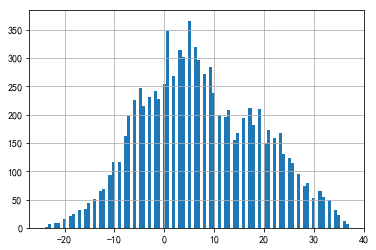

In [153]:
X['板温分层'].hist(bins=100 )

In [154]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X['板温分层']):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]


TRAIN: [7537  916 6125 ... 1032 1642 3052] TEST: [6417 4417 7637 ...  766  115 4380]


In [155]:
(X_train['板温分层'].value_counts() / len(X_train['板温分层'])).head()

5.0    0.040694
1.0    0.038611
6.0    0.035556
3.0    0.035000
4.0    0.033472
Name: 板温分层, dtype: float64

In [156]:
(X['板温分层'].value_counts() / len(X['板温分层'])).head()

5.0    0.040667
1.0    0.038556
6.0    0.035556
3.0    0.035000
4.0    0.033556
Name: 板温分层, dtype: float64

In [157]:
def plate_temperature_cat_proportions(data):
    return data["板温分层"].value_counts() / len(data)

train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": plate_temperature_cat_proportions(X),
    "Stratified": plate_temperature_cat_proportions(X_train),
    "Random": plate_temperature_cat_proportions(train_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [158]:
compare_props.head(20)

,Overall,Stratified,Random,Rand. %error,Strat. %error
-24.0,0.000222,0.000278,0.000278,25.000000,25.000000
-23.0,0.000667,0.000694,0.000694,4.166667,4.166667
-22.0,0.001000,0.000972,0.000972,-2.777778,-2.777778
-21.0,0.001000,0.000972,0.000833,-16.666667,-2.777778
-20.0,0.001778,0.001806,0.001528,-14.062500,1.562500
-19.0,0.002222,0.002222,0.002500,12.500000,0.000000
-18.0,0.002667,0.002639,0.002639,-1.041667,-1.041667
-17.0,0.003444,0.003472,0.003611,4.838710,0.806452
-16.0,0.003778,0.003750,0.003194,-15.441176,-0.735294
-15.0,0.004889,0.004861,0.005000,2.272727,-0.568182


In [159]:
X_train['板温分层'].head()

7537    12.0
916     -2.0
6125    23.0
5063    -8.0
1499     3.0
Name: 板温分层, dtype: float64

In [160]:
X_test['板温分层'].head()

6417    19.0
4417    -3.0
7637    16.0
4100    -7.0
4259    14.0
Name: 板温分层, dtype: float64

In [161]:
for set_ in (X_train, X_test):
    set_.drop(["板温分层"], axis=1, inplace=True)

#     for set in (strat_train_set, strat_test_set):
#     set.drop(["income_cat"], axis=1, inplace=True)

In [162]:
try:
    X_train['板温分层'].head(), X_test['板温分层'].head()
except KeyError:
    print("已删除")

已删除


In [163]:
X_train.head(), len(X_train)

(         板温  现场温度  光照强度    转换效率   转换效率A   转换效率B   转换效率C  电压A  电压B  电压C   电流A  \
 7537  11.76  10.8   166   18.22   18.91   17.66   18.09  650  647  644  1.45   
 916   -2.10 -11.9   307   40.83   40.88   40.65   40.96  693  693  689  5.18   
 6125  22.14   4.8   687   23.44   23.30   23.16   23.85  624  621  621  8.00   
 5063  -8.66 -12.0   296   29.26   28.96   28.48   30.35  720  719  718  3.33   
 1499   2.43  -0.9     8  530.69  524.66  527.45  539.97  685  681  682  1.78   
 
        电流B   电流C      功率A      功率B      功率C     平均功率   风速   风向  
 7537  1.36  1.40   942.50   879.92   901.60   908.01  4.7  277  
 916   5.15  5.22  3589.74  3568.95  3596.58  3585.09  1.5   62  
 6125  7.99  8.23  4992.00  4961.79  5110.83  5021.54  1.7  226  
 5063  3.28  3.50  2397.60  2358.32  2513.00  2422.97  1.8   44  
 1499  1.80  1.84  1219.30  1225.80  1254.88  1233.33  1.7  280  , 7200)

In [164]:
y_train.head(), len(y_train)

(7537     1.838621
 916      7.397647
 6125    10.604942
 5063     4.955602
 1499     2.391720
 Name: 发电量, dtype: float64, 7200)

数据探索和可视化、发现规律


In [165]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : [ 'sqrt'],
                  'randomforestregressor__max_depth': [None]}


# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : [ 'sqrt'],
                  'randomforestregressor__max_depth': [None]}
 

# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['sqrt'], 'randomforestregressor__max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.9975505530256369
0.028606347417402374


In [168]:
joblib.dump(clf, 'rf_regressor.pkl')
# 10. 将test_data的训练数据输入模型，计算出结果，并保存

clf = joblib.load("rf_regressor.pkl")

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(test_feature)

df_result['Score'] = pre
df_result.to_csv('../submit/submit_version2.csv', index=False, header=False, float_format='%.8f')